In [52]:
!pip install yfinance

In [53]:
!pip install nltk

In [54]:
!pip install vaderSentiment

In [55]:
!pip install langdetect

In [56]:
!pip install matplotlib

In [57]:
from langdetect import detect
from dateutil import parser

In [58]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
import yfinance
import nltk
import vaderSentiment
import matplotlib.pyplot as plt

In [60]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [61]:
apple=yfinance.Ticker("AAPL")

In [62]:
data=apple.history(period='1mo')

In [63]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-01 00:00:00-04:00,170.775011,174.000757,169.896164,173.741104,56934900,0.00,0.0
2023-11-02 00:00:00-04:00,175.289074,177.546095,175.229156,177.336380,77334800,0.00,0.0
2023-11-03 00:00:00-04:00,174.010754,176.587362,173.121926,176.417572,79763700,0.00,0.0
2023-11-06 00:00:00-05:00,176.147945,179.193920,175.978171,178.994186,63841300,0.00,0.0
2023-11-07 00:00:00-05:00,178.944239,182.199959,178.734524,181.580780,70530000,0.00,0.0
2023-11-08 00:00:00-05:00,182.110085,183.208629,181.351076,182.649368,49340300,0.00,0.0
2023-11-09 00:00:00-05:00,182.719278,183.877740,181.570782,182.169998,53763500,0.00,0.0
2023-11-10 00:00:00-05:00,183.970001,186.570007,183.529999,186.399994,66133400,0.24,0.0
2023-11-13 00:00:00-05:00,185.820007,186.029999,184.210007,184.800003,43627500,0.00,0.0


In [64]:
api_key='9dcab5d0d86940459623ec7dea5c8d36'
stock_symbol ="AAPL"

In [65]:
query_params = {
    'q': f'{stock_symbol}',
    'apiKey': api_key,
    'language': 'en',  # English language
    'country': 'us',   # USA sources
}


In [66]:
news_url = "https://newsapi.org/v2/everything"
response = requests.get(news_url, params=query_params)

In [67]:
import requests
from datetime import datetime, timedelta

# Define the date range for recent news (e.g., the last 7 days)
end_date = datetime.now()
start_date = end_date - timedelta(days=31)

# Format the dates in the required format (YYYY-MM-DD)
from_date = start_date.strftime("%Y-%m-%d")
to_date = end_date.strftime("%Y-%m-%d")

# Construct the News API URL
news_url = f"https://newsapi.org/v2/everything?q={stock_symbol}&apiKey={api_key}&from={from_date}&to={to_date}&language=en"

response = requests.get(news_url)

if response.status_code == 200:
    news_data = response.json()
    articles = news_data['articles']
    headlines = [(article['title'], article['publishedAt']) for article in articles]
else:
    print("Failed to retrieve news data.")

print(headlines)


[('AAPL Q4 2023: Analysts optimistic, despite warnings and negative signs', '2023-11-01T14:50:35Z'), ('AAPL share price dropped 11% since last earnings report', '2023-10-31T13:54:13Z'), ('Charles T Munger dies – the man Warren Buffett credits for his investment in AAPL', '2023-11-29T12:40:27Z'), ('9to5Mac Daily: November 3, 2023 –\xa0AAPL Q4 earnings, big-screen iMac dreams', '2023-11-03T18:38:31Z'), ("What to Expect From Apple's Earnings Report Tomorrow Following iPhone 15 Launch", '2023-11-01T20:02:33Z'), ('Goldman Sachs: New Macs position Apple well', '2023-10-31T16:30:41Z'), ('The Tell: Nobody on Wall Street wants to bet against the ‘Magnificent Seven’', '2023-11-08T21:28:00Z'), ('Earnings Results: Disney shares rise on huge increase in streaming users, improved earnings', '2023-11-08T21:25:00Z'), ('Market Extra: Technology stocks hit record high as Nasdaq looks to exit correction territory', '2023-11-14T18:08:00Z'), ('Market Extra: Why a derailed $11 trillion corporate bond market

In [68]:
apple_related_headlines=[]

In [69]:
for headline, _ in headlines:
    try:
        date = parser.parse(_)
        if 'Apple' in headline:
            apple_related_headlines.append((headline, date))
    except ValueError:
        pass

In [70]:
apple_related_headlines.sort(key=lambda x: x[1])
for data in apple_related_headlines:
    print(f'Headline: {data[0]}\nDate: {data[1]}\n')

Headline: Goldman Sachs: New Macs position Apple well
Date: 2023-10-31 16:30:41+00:00

Headline: Apple’s 3 New Chips: Everything You Need To Know
Date: 2023-10-31 17:22:13+00:00

Headline: Apple earnings: options market is pricing in 4.2% move in either direction
Date: 2023-10-31 19:24:36+00:00

Headline: 米Belkin、MagSafeに対応しiPhoneの15Wワイヤレス充電に加えApple Watchの高速充電にも対応した充電ステーション「BoostCharge Pro 2-in-1 Wireless Charging Dock」を発表。
Date: 2023-11-01 04:07:32+00:00

Headline: What to Expect From Apple's Earnings Report Tomorrow Following iPhone 15 Launch
Date: 2023-11-01 20:02:33+00:00

Headline: Apple Third Quarter Results Completes Big Tech Earnings Season
Date: 2023-11-02 20:54:14+00:00

Headline: Dow Jones Soars 565 Points As Apple Sales Fall; Warren Buffett Stock Offers This 'Attractive Entry'
Date: 2023-11-02 21:04:15+00:00

Headline: Gene Munster: Apple’s doing better than it looks; China concerns were overblown
Date: 2023-11-03 15:39:36+00:00

Headline: SwitchBot for iOSがApple Watchのコンプリ

In [71]:
df_apple_related_headlines = pd.DataFrame(apple_related_headlines, columns= ['Headlines', 'date'])

In [72]:
df_apple_related_headlines

,Headlines,date
0,Goldman Sachs: New Macs position Apple well,2023-10-31 16:30:41+00:00
1,Apple’s 3 New Chips: Everything You Need To Know,2023-10-31 17:22:13+00:00
2,Apple earnings: options market is pricing in 4...,2023-10-31 19:24:36+00:00
3,米Belkin、MagSafeに対応しiPhoneの15Wワイヤレス充電に加えApple W...,2023-11-01 04:07:32+00:00
4,What to Expect From Apple's Earnings Report To...,2023-11-01 20:02:33+00:00
5,Apple Third Quarter Results Completes Big Tech...,2023-11-02 20:54:14+00:00
6,Dow Jones Soars 565 Points As Apple Sales Fall...,2023-11-02 21:04:15+00:00
7,Gene Munster: Apple’s doing better than it loo...,2023-11-03 15:39:36+00:00
8,SwitchBot for iOSがApple Watchのコンプリケーションに対応。,2023-11-06 05:24:22+00:00
9,"Charlie Munger's Apple Confidence, Raskin Take...",2023-11-06 10:26:19+00:00


In [73]:
df_unique_apple_related_headlines = df_apple_related_headlines.drop_duplicates(subset=['Headlines'])

In [74]:
df_unique_apple_related_headlines

,Headlines,date
0,Goldman Sachs: New Macs position Apple well,2023-10-31 16:30:41+00:00
1,Apple’s 3 New Chips: Everything You Need To Know,2023-10-31 17:22:13+00:00
2,Apple earnings: options market is pricing in 4...,2023-10-31 19:24:36+00:00
3,米Belkin、MagSafeに対応しiPhoneの15Wワイヤレス充電に加えApple W...,2023-11-01 04:07:32+00:00
4,What to Expect From Apple's Earnings Report To...,2023-11-01 20:02:33+00:00
5,Apple Third Quarter Results Completes Big Tech...,2023-11-02 20:54:14+00:00
6,Dow Jones Soars 565 Points As Apple Sales Fall...,2023-11-02 21:04:15+00:00
7,Gene Munster: Apple’s doing better than it loo...,2023-11-03 15:39:36+00:00
8,SwitchBot for iOSがApple Watchのコンプリケーションに対応。,2023-11-06 05:24:22+00:00
9,"Charlie Munger's Apple Confidence, Raskin Take...",2023-11-06 10:26:19+00:00


In [75]:
analyzer = SentimentIntensityAnalyzer()
sentiments = []
neg_scores = []
neu_scores = []
pos_scores = []
compound_scores = []
for sentence in df_unique_apple_related_headlines['Headlines']:
    vs = analyzer.polarity_scores(sentence)
    sentiments.append(sentence)
    neg_scores.append(vs['neg'])
    neu_scores.append(vs['neu'])
    pos_scores.append(vs['pos'])
    compound_scores.append(vs['compound'])

In [76]:
sentiment_df = pd.DataFrame({
    'Headlines': sentiments,
    'Negative Score': neg_scores,
    'Neutral Score': neu_scores,
    'Positive Score': pos_scores,
    'Compound Score': compound_scores
})

In [77]:
sentiment_df.head()

,Headlines,Negative Score,Neutral Score,Positive Score,Compound Score
0,Goldman Sachs: New Macs position Apple well,0.0,0.741,0.259,0.2732
1,Apple’s 3 New Chips: Everything You Need To Know,0.0,1.000,0.000,0.0000
2,Apple earnings: options market is pricing in 4...,0.0,1.000,0.000,0.0000
3,米Belkin、MagSafeに対応しiPhoneの15Wワイヤレス充電に加えApple W...,0.0,1.000,0.000,0.0000
4,What to Expect From Apple's Earnings Report To...,0.0,1.000,0.000,0.0000


In [78]:
merged_df= pd.merge(df_unique_apple_related_headlines, sentiment_df, how="inner", on=["Headlines"])

In [79]:
merged_df

,Headlines,date,Negative Score,Neutral Score,Positive Score,Compound Score
0,Goldman Sachs: New Macs position Apple well,2023-10-31 16:30:41+00:00,0.000,0.741,0.259,0.2732
1,Apple’s 3 New Chips: Everything You Need To Know,2023-10-31 17:22:13+00:00,0.000,1.000,0.000,0.0000
2,Apple earnings: options market is pricing in 4...,2023-10-31 19:24:36+00:00,0.000,1.000,0.000,0.0000
3,米Belkin、MagSafeに対応しiPhoneの15Wワイヤレス充電に加えApple W...,2023-11-01 04:07:32+00:00,0.000,1.000,0.000,0.0000
4,What to Expect From Apple's Earnings Report To...,2023-11-01 20:02:33+00:00,0.000,1.000,0.000,0.0000
5,Apple Third Quarter Results Completes Big Tech...,2023-11-02 20:54:14+00:00,0.000,1.000,0.000,0.0000
6,Dow Jones Soars 565 Points As Apple Sales Fall...,2023-11-02 21:04:15+00:00,0.000,0.816,0.184,0.5228
7,Gene Munster: Apple’s doing better than it loo...,2023-11-03 15:39:36+00:00,0.000,0.791,0.209,0.4404
8,SwitchBot for iOSがApple Watchのコンプリケーションに対応。,2023-11-06 05:24:22+00:00,0.000,1.000,0.000,0.0000
9,"Charlie Munger's Apple Confidence, Raskin Take...",2023-11-06 10:26:19+00:00,0.082,0.684,0.234,0.5326


In [80]:
print(data.index)

<built-in method index of tuple object at 0x7d260ec796c0>


In [81]:
merged_df['date'] = merged_df['date'].astype(int)

[*********************100%%**********************]  1 of 1 completed


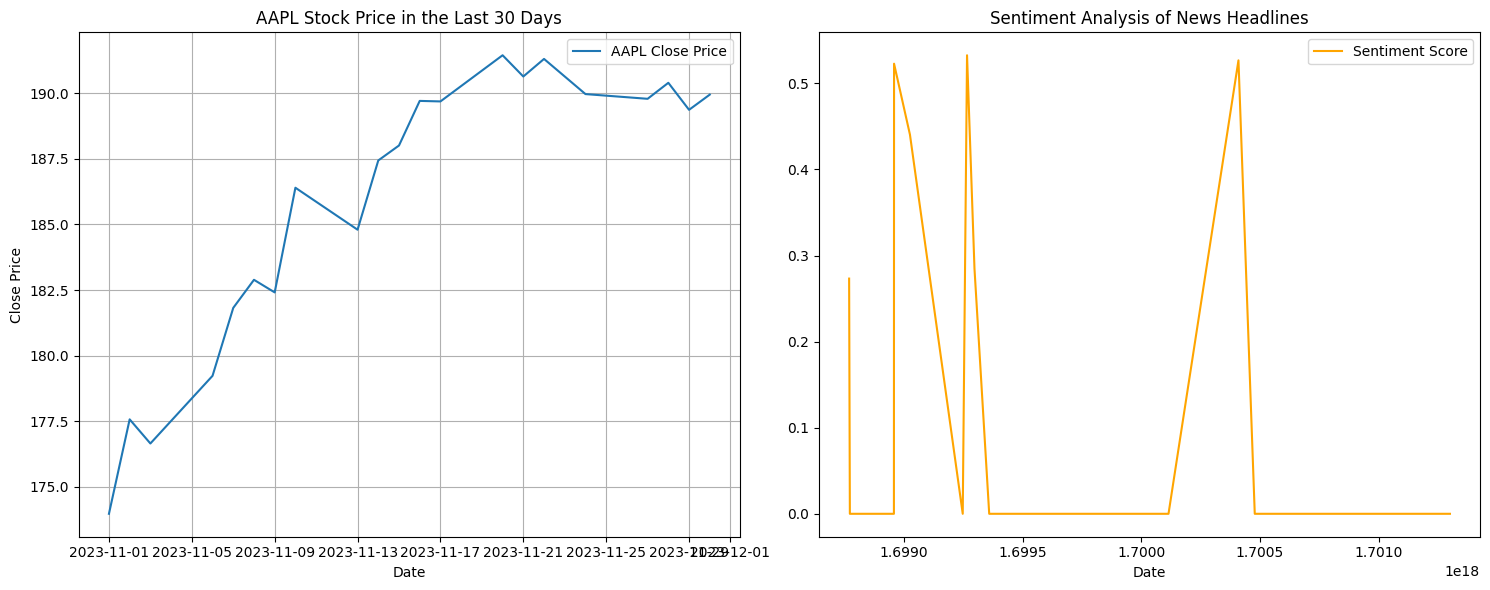

In [83]:
# To fetch AAPL stock data for the last 30 days
ticker = 'AAPL'
start_date = (pd.to_datetime('today') - pd.DateOffset(days=30)).strftime('%Y-%m-%d')
end_date = pd.to_datetime('today').strftime('%Y-%m-%d')

stock_data = yf.download(ticker, start=start_date, end=end_date)

# Plotting the closing prices of AAPL stock
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: AAPL Stock Price
axs[0].plot(stock_data.index, stock_data['Close'], label='AAPL Close Price')
axs[0].set_title('AAPL Stock Price in the Last 30 Days')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close Price')
axs[0].legend()
axs[0].grid(True)

# Plot 2: Sentiment Analysis
axs[1].plot(merged_df['date'], merged_df['Compound Score'], label='Sentiment Score', color='orange')
axs[1].set_title('Sentiment Analysis of News Headlines')
axs[1].set_xlabel('Date')
axs[1].legend()

plt.tight_layout()
plt.savefig('Combined_Plot.png')
plt.show()

